# Computational assignment 1: Baseball and golf


###### By: Simone Otelie Solstrand and Stine Bratlie

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Library for 3d-plots

## 1. Baseball

#### a. Baseball: batted ball

Estimate the maximum range of a batted baseball and the corresponding optimal batting angle to within 1◦.
   Use a initial velocity of 50 m/s and the air drag model detailed by Eq. (1). 
   Estimate the speed required to hit a home run (≈ 168 m). 
   Perform the same calculation with a tailwind and headwind of 10 m/s, incorporate winds using Eq. (2).

In [98]:
v_d = 35              #[v] = m/s
delta = 5             #[delta] = m/s
home_run = 168        #length 
kb = 1.38E-23       
g = 9.81              #m/S^2 
h = 0.1 

t0 = 0
t_end = 100 

#initial values
theta_list = [20,30,45,50,60]  #liste med theta verdier! 

v0_a = 50                         #initial velocity
x0_a = 0                          #intitial x-position
y0_a = 0                          #initial y-position
z0_a = 0                          #initial z-position
theta_knuck0 = 0                  #initial angular orientation of the ball



In [99]:
#air drag model, equation 1, v = velocity relative to the wind 
"""
    arr = np.array([eq_val[0][3], eq_val[0][4], eq_val[0][5], 
                    b2m*abs(v0-v_wind)*((eq_val[0][3])-v_wind), 
                    -g-(b2m*abs(v0-v_wind)*(eq_val[0][4])), 0]) # ENDRE VX OG VY INNI OG?
    
    return arr
"""
def B2m(v):
    B = 0.0039 + 0.0058/(1+np.exp((v - v_d)/delta))  
    return B

#Headwind = 10 m/s; v = -10 m/s

#Functions for f; one for each type of wind  ----------------------------------------
def f_wind_head(t_val, eq_val): #eq_val is an array,*** #Where do we use t_val?
    v_wind = 10
    v = np.sqrt((eq_val[-1][3]**2 + eq_val[-1][4]**2))
    b2mx = B2m(eq_val[-1][3])
    b2my = B2m(eq_val[-1][4])

    arr = np.array([eq_val[-1][3],eq_val[-1][4],0,
                   -b2mx*abs(v-v_wind)*(eq_val[-1][3]-v_wind),
                    -g-(b2my*abs(v-v_wind)*(eq_val[-1][4])), 0, 0])

    return arr

def f_wind_tail(t_val, eq_val):  
    v_wind = -10
    v = np.sqrt((eq_val[-1][3]**2 + eq_val[-1][4]**2))
    b2mx = B2m(eq_val[-1][3])
    b2my = B2m(eq_val[-1][4])

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[-1][5],
                    -b2mx*abs(v-v_wind)*(eq_val[-1][3]-v_wind),
                    -g-(b2my*abs(v-v_wind)*(eq_val[-1][4])), 0, 0])
    
    return arr
#-----------------------------------------------------------------------------


#Runge Kutta and ODE Solver -------------------------------------------------
def rk4(f, t_val, eq_val, h):                               #Runge kutta 4
    k1 = f(t_val, eq_val)                                   #definerer k1, k2, k3 og k4 
    k2 = f(t_val + h/2, eq_val + h*k1/2)
    k3 = f(t_val + h/2, eq_val + h*k2/2)
    k4 = f(t_val + h, eq_val + h*k3)

    eq_next = eq_val + (h/6)*(k1 + 2*k2 + 2*k3 + k4)        #Neste verdiene

    return eq_next                                          #returnerer de neste verdiene

def ode_solver_rk4(f, t0, t_end, theta, x0, y0, z0, v0, theta0, h, method): 
    #Initialisering
    vx0 = v0*np.cos(theta)
    vy0 = v0*np.sin(theta)
    vz0 = np.sqrt(np.abs(v0**2-vx0**2-vy0**2)) 
    
    
    eq_num = np.array([[x0, y0, z0, vx0, vy0, vz0, theta0]])                       

    tn = np.linspace(t0, t_end, int(t_end/h)+1)                   #Lager array med tidene
    eqn = np.array([[x0, y0, z0, vx0, vy0, vz0, theta0]])                          

    i=0
    
    while tn[i] < t_end:        
          
        eqn = method(f, tn[i], eqn, h)                            #Gjør et steg med metoden vår
        
        eq_num = np.concatenate((eq_num, eqn), axis=0)   #Legger til verdiene i arrayen vi har laget tidligere
        
        i+=1
    
    return tn, eq_num                    #Returnerer tider og tilhørende theta og omega verdier

In [100]:
#Find the x position when the ball hits the ground, and what i, so we know what part of y to use
def x_pos(eq):
    x = eq[:,0]
    y = eq[:,1]
    
    for i in range(len(y)) :
        if y[i] < 0:
            x_pos = x[i]
            return x_pos, i




Headwind: 
The optimal batting angle is 41 degrees and the maximum range is 146.39380878811485


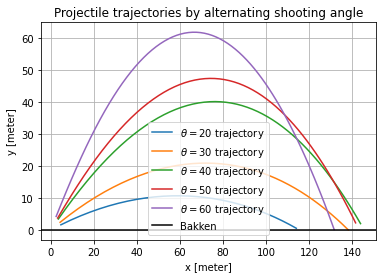

Tailwind: 
The optimal batting angle is 26 degrees and the maximum range is 83.12554129757444


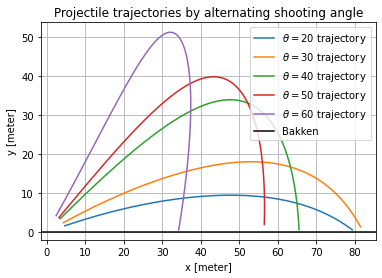

In [101]:
#Find the optimal batting angle 
def optimalangle(theta_list, wind):
    theta1 = np.radians(theta_list[0])                    #Henter theta verdiene
    theta2 = np.radians(theta_list[1])
    theta3 = np.radians(theta_list[2])
    theta4 = np.radians(theta_list[3])
    theta5 = np.radians(theta_list[4])

    _, w1 = ode_solver_rk4(wind, t0, t_end, theta1, x0_a, y0_a, z0_a, v0_a, theta_knuck0, h, rk4)   #Bruker RK4 
    _, w2 = ode_solver_rk4(wind, t0, t_end, theta2, x0_a, y0_a, z0_a, v0_a, theta_knuck0, h, rk4)
    _, w3 = ode_solver_rk4(wind, t0, t_end, theta3, x0_a, y0_a, z0_a, v0_a, theta_knuck0, h, rk4)
    _, w4 = ode_solver_rk4(wind, t0, t_end, theta4, x0_a, y0_a, z0_a, v0_a, theta_knuck0, h, rk4)
    _, w5 = ode_solver_rk4(wind, t0, t_end, theta5, x0_a, y0_a, z0_a, v0_a, theta_knuck0, h, rk4)

    her1, i1 = x_pos(w1)                                                      #Finner hvor y blir negativ 
    her2, i2 = x_pos(w2)
    her3, i3 = x_pos(w3)
    her4, i4 = x_pos(w4)
    her5, i5 = x_pos(w5)

    x_val = w1[1:i1,0]
    y_val = w1[1:i1,1]

    x_val2 = w2[1:i2,0]
    y_val2 = w2[1:i2,1]

    x_val3 = w3[1:i3,0]
    y_val3 = w3[1:i3,1]

    x_val4 = w4[1:i4,0]
    y_val4 = w4[1:i4,1]

    x_val5 = w5[1:i5,0]
    y_val5 = w5[1:i5,1]
    
    
    x_values = []
    for thetadeg in range(0,50,):  #0....49
        theta = np.radians(thetadeg)
        _, warray = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v0_a, theta_knuck0, h, rk4)
        her, i1 = x_pos(warray) 
        x_values.append(her)
    
    x_biggest = np.sort(x_values)
    max_range = x_biggest[-1]
    
    i = x_values.index(max_range)
    optimal = 0 + i 
    
    print(f'The optimal batting angle is {optimal} degrees and the maximum range is {max_range}')
            

    plt.figure()
    plt.title("Projectile trajectories by alternating shooting angle")
    plt.xlabel("x [meter]")
    plt.ylabel("y [meter]")
    plt.plot(x_val,y_val, label=r'$\theta = 20$' " trajectory")
    plt.plot(x_val2,y_val2, label=r'$\theta = 30$' " trajectory")
    plt.plot(x_val3,y_val3, label=r'$\theta = 40$' " trajectory")
    plt.plot(x_val4,y_val4, label=r'$\theta = 50$' " trajectory")
    plt.plot(x_val5,y_val5, label=r'$\theta = 60$' " trajectory")
    plt.axhline(0, color = 'k', label="Bakken")
    plt.legend()
    plt.grid()
    plt.show()
    
    return optimal

print("Headwind: ")
optimal_headwind = optimalangle(theta_list,f_wind_head)

print("Tailwind: ")
optimal_tailwind = optimalangle(theta_list,f_wind_tail)

Wind head
The initial speed 80 lets the ball almost hit a homerun; 167.14520633364162
The initial speed 90 lets the ball almost hit a homerun; 186.84713448220506


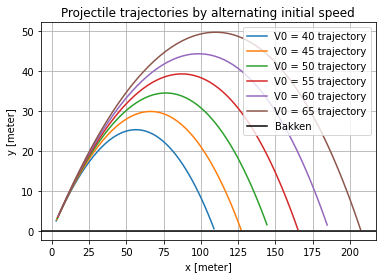

Wind tail
The initial speed 60 lets the ball almost hit a homerun; 161.332491958777
The initial speed 70 lets the ball almost hit a homerun; 172.22936195599212
The initial speed 80 lets the ball almost hit a homerun; 183.8537467289341
The initial speed 90 lets the ball almost hit a homerun; 195.08690478969163


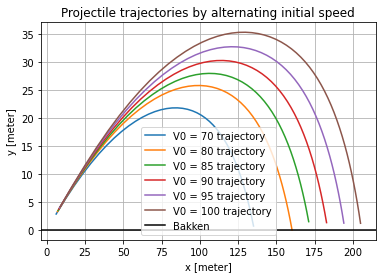

In [102]:
#Different winds
v0_list_head = [40,45,50,55,60,65]
v0_list_tail = [70,80,85,90,95,100]

def find_speed(v0list, wind, thetaopt):
    theta = np.radians(thetaopt)

    
    v01 = v0list[0]
    v02 = v0list[1]
    v03 = v0list[2]
    v04 = v0list[3]
    v05 = v0list[4]
    v06 = v0list[5]
    
    _, w1 = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v01, theta_knuck0, h, rk4)   #Bruker RK4 
    _, w2 = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v02, theta_knuck0, h, rk4)
    _, w3 = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v03, theta_knuck0, h, rk4)
    _, w4 = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v04, theta_knuck0, h, rk4)
    _, w5 = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v05, theta_knuck0, h, rk4)
    _, w6 = ode_solver_rk4(wind, t0, t_end, theta, x0_a, y0_a, z0_a, v06, theta_knuck0, h, rk4)

    _1, i1 = x_pos(w1)                                                        #Finner hvor y blir negativ 
    _2, i2 = x_pos(w2)
    _3, i3 = x_pos(w3)
    _4, i4 = x_pos(w4)                                                        #Finner hvor y blir negativ 
    _5, i5 = x_pos(w5)
    _6, i6 = x_pos(w6)
    
    x_val = w1[1:i1,0]
    y_val = w1[1:i1,1]

    x_val2 = w2[1:i2,0]
    y_val2 = w2[1:i2,1]

    x_val3 = w3[1:i3,0]
    y_val3 = w3[1:i3,1]
    
    x_val4 = w4[1:i4,0]
    y_val4 = w4[1:i4,1]

    x_val5 = w5[1:i5,0]
    y_val5 = w5[1:i5,1]

    x_val6 = w6[1:i6,0]
    y_val6 = w6[1:i6,1]

    length = [_1,_2,_3,_4,_5,_6]
    where = 0
    for i in length:
        if i > 150 and i < 200:
            print(f'The initial speed {v0_list[where]} lets the ball almost hit a homerun; {i}')
        where += 1
    #Here we could instead make a function that would change the velocities until it got a homerun.

    plt.figure()
    plt.title(r"Projectile trajectories by alternating initial speed")
    plt.xlabel("x [meter]")
    plt.ylabel("y [meter]")
    plt.plot(x_val,y_val, label=f'V0 = {v01} trajectory')
    plt.plot(x_val2,y_val2, label=f'V0 = {v02} trajectory')
    plt.plot(x_val3,y_val3, label=f'V0 = {v03} trajectory')
    plt.plot(x_val4,y_val4, label=f'V0 = {v04} trajectory')
    plt.plot(x_val5,y_val5, label=f'V0 = {v05} trajectory')
    plt.plot(x_val6,y_val6, label=f'V0 = {v06} trajectory')
    plt.axhline(0, color = 'k', label="Bakken")
    plt.legend()
    plt.grid()
    plt.show()

print("Wind head")
find_speed(v0_list_head, f_wind_head, optimal_headwind)
print("Wind tail")
find_speed(v0_list_tail, f_wind_tail, optimal_tailwind)

#### b. Baseball: curve ball
Calculate the trajectory of a pitched ball thrown horizontally in the
x direction with an initial velocity of 35 m/s. Assume that the ball is thrown from y = 1.8 m, with an initial angle of 0◦. Plot the
trajectory in the xz-plane. Next, add a rotation to the ball along the
y-axis with an angular velocity of 30 rev/s using the EOMs given by
Eq. (4). Calculate the trajectory and compare it to the one for the
non rotating baseball. How much is the trajectory deflected into the
z-direction due to the Magnus force?

In [103]:
S0m = 4.1E-4    # Numerical coefficient. For velocities from 20-50 m/s
m = 0.149       #Mass in kg
w = 30*2*np.pi  # Rotation [w] = rad/sec

#Updated initial values:
theta_b = 0
y0_b = 1.8
v0_b = 35
h = 0.01 #redefining the h, for nicer plots


In [104]:
#Equation of motion, no curveature:
def f_regular(t_val,eq_val):
    v = np.sqrt(abs((eq_val[-1][3])**2+(eq_val[-1][4])**2))
    b2m = B2m(v)
    
    
    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[-1][5], 
                    -b2m*v*eq_val[-1][3],
                    -g, 0, 0] )
    return arr


_, w_reg = ode_solver_rk4(f_regular, t0, t_end, theta_b, x0_a, y0_b, z0_a,v0_b, theta_knuck0, h, rk4)

In [105]:
#Equations of motion, curveball (4):

def f_curveball(t_val,eq_val):
    v = np.sqrt(abs(eq_val[-1][3]**2+eq_val[-1][4]**2))
    b2mx = B2m(eq_val[-1][3])

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[-1][5], 
                    -b2mx*v*eq_val[-1][3],
                    -g, -(S0m*eq_val[-1][3]*w), 0])
                
    
    return arr

_, w_curve = ode_solver_rk4(f_curveball, t0, t_end, theta_b, x0_a, y0_b, z0_a, v0_b,theta_knuck0, h, rk4)

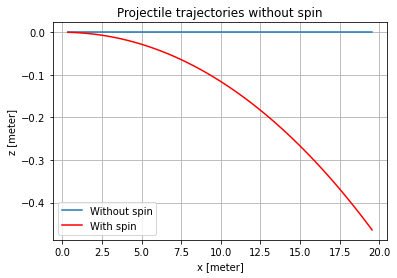

The trajectory is deflected by 0.46 meter, due to the Magnus force


In [106]:
#Calculates and plots the curve ball trajectory
_, i_reg = x_pos(w_curve)
_, i_curve = x_pos(w_curve)


x_val_reg = w_reg[1:i_reg,0]
y_val_reg = w_reg[1:i_reg,1]
z_val_reg = w_reg[1:i_reg,2]

x_val_curve = w_curve[1:i_curve,0]
y_val_curve = w_curve[1:i_curve,1]
z_val_curve = w_curve[1:i_curve,2]


plt.figure()
plt.title("Projectile trajectories without spin")
plt.xlabel("x [meter]")
plt.ylabel("z [meter]")
plt.plot(x_val_reg,z_val_reg, label="Without spin")
plt.plot(x_val_curve,z_val_curve,color = "r", label="With spin")
plt.legend()
plt.grid()
plt.show()

print(f"The trajectory is deflected by {round(z_val_reg[-1]-z_val_curve[-1], 2)} meter, due to the Magnus force")




#### c. Baseball: knuckleball
Investigate the trajectories of knuckleballs as a function of the initial
angular orientation, the angular velocity ω and the initial velocity.
Do this by calculating the trajectories for a several values in a fixed
range. Use the same initial height and throwing angle as in (b). Plot
the trajectories in the xz-plane.

In [107]:
theta_knuck_list = [0, 0.1, 0.2, 0.3] #List with initial angular orientations
omega_list = [1.5,2,3,4]              #List with angular velocities

#Updated initial conditions
theta0_c = 0
x0_c = 0
y0_c = 1.8
z0_c = 0
theta_knuck0 = 0
v0_c = 35



In [108]:
#Function for lateral force --------------------------------------------------------------------------
def f_lateral_mg(theta):
    f = 0.5*(np.sin(4*theta)-0.25*np.sin(8*theta)+0.08*np.sin(12*theta)-0.025*np.sin(16*theta))
    return m*g*f

#Function for knuckleball-trajectory------------------------------------------------------------------
def f_knuckleball(t_val,eq_val):
    v = np.sqrt(abs((eq_val[-1][3])**2+(eq_val[-1][4])**2))
    b2mx = B2m(eq_val[-1][3])

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[-1][5], 
                    -b2mx*v*eq_val[-1][3],                                                          
                    -g, -(S0m*eq_val[-1][3]*w)+f_lateral_mg(eq_val[-1][6]),w])
                
    
    return arr



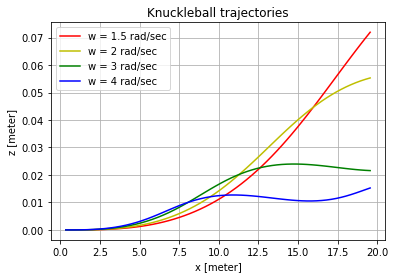

In [109]:
#Defining different angular velocities and calculating the trajectory with rK4---------------------------------------       
w = omega_list[0]
_, w1 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c,v0_c, theta_knuck0, h, rk4)    
w = omega_list[1]
_, w2 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c,v0_c, theta_knuck0, h, rk4)
w = omega_list[2]
_, w3 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c,v0_c, theta_knuck0, h, rk4)
w = omega_list[3]
_, w4 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c,v0_c, theta_knuck0, h, rk4)


_, i1 = x_pos(w1)
_, i2 = x_pos(w2)
_, i3 = x_pos(w3)
_, i4 = x_pos(w4)                                                        #Find where y is negative


#Slice the arrays

x_val_1 = w1[1:i1,0]
y_val_1 = w1[1:i1,1]                                                    
z_val_1 = w1[1:i1,2]
theta_val_1 = w1[1:i1,6]

x_val_2 = w2[1:i2,0]
z_val_2 = w2[1:i2,2]

x_val_3 = w3[1:i3,0]
z_val_3 = w3[1:i3,2]

x_val_4 = w4[1:i4,0]
z_val_4 = w4[1:i4,2]


#Plotting the knuckleball-trajectories
plt.figure()
plt.title("Knuckleball trajectories")
plt.xlabel("x [meter]")
plt.ylabel("z [meter]")
plt.plot(x_val_1,z_val_1, color = "r", label=f"w = {omega_list[0]} rad/sec")
plt.plot(x_val_2,z_val_2, color = "y", label=f"w = {omega_list[1]} rad/sec")
plt.plot(x_val_3,z_val_3, color = "g", label=f"w = {omega_list[2]} rad/sec")
plt.plot(x_val_4,z_val_4, color = "b", label=f"w = {omega_list[3]} rad/sec")
plt.legend()
plt.grid()
plt.show()


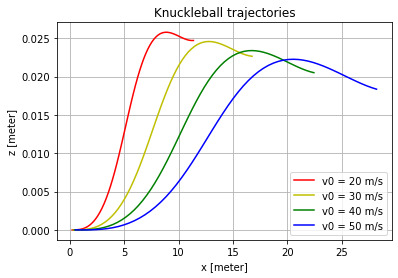

In [110]:
w = 3 #Set a new constant angular velocity

#Defining initial velocities and calculating the trajectory with rK4 as previous---------------------------------------       
v0 = initial_velocity_list[0]
_, w1 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0, theta_knuck0, h, rk4)    
v0 = initial_velocity_list[1]
_, w2 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0, theta_knuck0, h, rk4)
v0 = initial_velocity_list[2]
_, w3 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0, theta_knuck0, h, rk4)
v0 = initial_velocity_list[3]
_, w4 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0, theta_knuck0, h, rk4)



_, i1 = x_pos(w1)
_, i2 = x_pos(w2)
_, i3 = x_pos(w3)
_, i4 = x_pos(w4)                                                         


x_val_1 = w1[1:i1,0]
z_val_1 = w1[1:i1,2]

x_val_2 = w2[1:i2,0]
z_val_2 = w2[1:i2,2]

x_val_3 = w3[1:i3,0]
z_val_3 = w3[1:i3,2]

x_val_4 = w4[1:i4,0]
z_val_4 = w4[1:i4,2]


plt.figure()
plt.title("Knuckleball trajectories")
plt.xlabel("x [meter]")
plt.ylabel("z [meter]")
plt.plot(x_val_1,z_val_1, color = "r", label=f"v0 = {round(initial_velocity_list[0])} m/s")
plt.plot(x_val_2,z_val_2, color = "y", label=f"v0 = {round(initial_velocity_list[1])} m/s")
plt.plot(x_val_3,z_val_3, color = "g", label=f"v0 = {round(initial_velocity_list[2])} m/s")
plt.plot(x_val_4,z_val_4, color = "b", label=f"v0 = {round(initial_velocity_list[3])} m/s")
plt.legend()
plt.grid()
plt.show()

In [111]:
#Function for defining initial angular orientations, 
#calculating the trajectory with rK4  and plot the tracetories as previous---------------------------------------       
def plot_init_theta(theta_knuck_list):

    theta_knuck_1 = theta_knuck_list[0]
    theta_knuck_2 = theta_knuck_list[1]
    theta_knuck_3 = theta_knuck_list[2]
    theta_knuck_4 = theta_knuck_list[3]

    _, w1 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0_c, theta_knuck_1, h, rk4)   #Bruker RK4 
    _, w2 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0_c, theta_knuck_2, h, rk4)
    _, w3 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0_c, theta_knuck_3, h, rk4)
    _, w4 = ode_solver_rk4(f_knuckleball, t0, t_end, theta0_c, x0_c, y0_c, z0_c, v0_c, theta_knuck_4, h, rk4)


    _, i1 = x_pos(w1)
    _, i2 = x_pos(w2)
    _, i3 = x_pos(w3)
    _, i4 = x_pos(w4)                                                        #Finner hvor y blir negativ 


    x_val_1 = w1[1:i1,0]
    z_val_1 = w1[1:i1,2]

    x_val_2 = w2[1:i2,0]
    z_val_2 = w2[1:i2,2]

    x_val_3 = w3[1:i3,0]
    z_val_3 = w3[1:i3,2]

    x_val_4 = w4[1:i4,0]
    z_val_4 = w4[1:i4,2]


    plt.figure()
    plt.title("Knuckleball trajectories")
    plt.xlabel("x [meter]")
    plt.ylabel("z [meter]")
    plt.plot(x_val_1,z_val_1, color = "r", label=f"theta_knuck = {round(theta_knuck_1,2)} rad")
    plt.plot(x_val_2,z_val_2, color = "y", label=f"theta_knuck = {round(theta_knuck_2,2)} rad")
    plt.plot(x_val_3,z_val_3, color = "g", label=f"theta_knuck = {round(theta_knuck_3,2)} rad")
    plt.plot(x_val_4,z_val_4, color = "b", label=f"theta_knuck = {round(theta_knuck_4,2)} rad")
    plt.legend()
    plt.grid()
    plt.show()

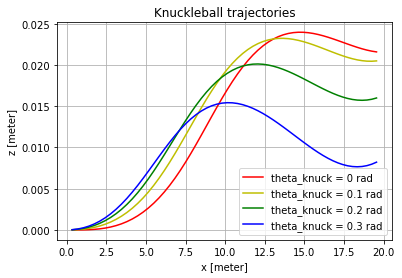

In [112]:
plot_init_theta(theta_knuck_list) #Using the function defined over

From the plots above, it is clear that the trajectory is affected in different ways for the different values.

The lateral-force is dependent on the angular orientation $\theta$, and the development of $\theta$ is dependent on the angular velocity $\omega$. Because of this the trajectory will have different wave-like shapes for different angular velocities $\omega$, as the lateral force will vary. For a larger angular velocity, the development of theta, and the lateral force, will be more significant, hence the deflection of the trajectory will be larger and more noticeable.

The total range thrown is dependent on the velocity $v_0$, so it is the range that will vary for diifferent initial velocities. The overall shape of the trajectory will be the same since the angular velocity is constant, however the ball will travel further for larger velocities.

For the case with different initial angular orientations, the range will be the same, but the curvature due to the lateral force will take place at different times. For larger initial angular orientations, the deflection will appear earlier in the trajectory.



### 2. Golf

#### a.
Calculate and plot the trajectory of a golf ball using the EOM given
by Eq. (7). Use an initial velocity of 70 m/s and an initial angle of 9◦.
Repeat with 50% more backspin. Compare the resulting trajectories
with the trajectories of a spinning smooth ball (C = 1/2) and a golf
ball without spin.

In [113]:
#Initial values updated
v0_golf = 70                    #[m/s]
theta_golf = np.deg2rad(9)      #[rad]
y0_golf = 0
x0_golf = 0 
S0wm_golf = 0.25             #[s-1]
S0wm_golf_backspin = 0.25*1.5             #[s-1]

m_golf = 0.04593           # [kg]
r_golf = 21.43E-3          # [m]
A_golf = np.pi * r_golf**2  
V_golf = 4/3 * np.pi * r_golf**3
rho = 1.225                #Sea level density [kg/m^3]

In [114]:
#Function for calculating constant------------------------------------------------------------
def constant(v0):  
    C = 0
    if v0 < 14: 
        C = 0.5
    if v0 > 14:
        C = 7 / v0
    return C

#Function for calculating regular golf trajectory ---------------------------------------------
def f_golf(t_val, eq_val):
    v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)

    C_x = constant(eq_val[-1][3])
    C_y = constant(eq_val[-1][4])

    f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
    f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2

    S0_x = (S0wm_golf * eq_val[-1][4])
    S0_y = (S0wm_golf * eq_val[-1][3])
   

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[0][5],
                    - f_drag_x/m_golf - S0_x,
                    -g - f_drag_y/m_golf + S0_y,0,0])
    return arr

#Function for calculating golf trajectory with backspin---------------------------------------------
def f_golf_backspin(t_val, eq_val):
    v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)

    C_x = constant(eq_val[-1][3])
    C_y = constant(eq_val[-1][4])

    f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
    f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2

    S0_x = (S0wm_golf_backspin * eq_val[-1][4])
    S0_y = (S0wm_golf_backspin * eq_val[-1][3])
   

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[0][5],
                    - f_drag_x/m_golf - S0_x,
                    -g - f_drag_y/m_golf + S0_y,0,0])
    return arr

#Function for calculating the smooth golf trajectory ---------------------------------------------

def f_smooth(t_val, eq_val):
    v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)

    C_x = 1/2
    C_y = 1/2

    f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2  #gjøre om til absoluttverdi til totalfart * atan ? 
    f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2

    S0_x = (S0wm_golf * eq_val[-1][4])
    S0_y = (S0wm_golf * eq_val[-1][3])
   

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[0][5],
                    - f_drag_x/m_golf - S0_x,
                    -g - f_drag_y/m_golf + S0_y,0,0])
    return arr


#Function for calculating the golf trajectory with no spin---------------------------------------------

def f_nospin(t_val, eq_val):
    v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)

    C_x = constant(eq_val[-1][3])
    C_y = constant(eq_val[-1][4])

    f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
    f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2

    S0_x = (S0wm_golf * eq_val[-1][4])
    S0_y = (S0wm_golf * eq_val[-1][3])
   

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[0][5],
                    - f_drag_x/m_golf,
                    -g - f_drag_y/m_golf,0,0])
    return arr


<ipython-input-114-443aec1fe68e>:12: RuntimeWarning: overflow encountered in double_scalars
  v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)
<ipython-input-114-443aec1fe68e>:18: RuntimeWarning: overflow encountered in double_scalars
  f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2
<ipython-input-114-443aec1fe68e>:17: RuntimeWarning: overflow encountered in double_scalars
  f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
<ipython-input-114-443aec1fe68e>:25: RuntimeWarning: invalid value encountered in double_scalars
  - f_drag_x/m_golf - S0_x,
<ipython-input-114-443aec1fe68e>:31: RuntimeWarning: overflow encountered in double_scalars
  v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)
<ipython-input-114-443aec1fe68e>:37: RuntimeWarning: overflow encountered in double_scalars
  f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2
<ipython-input-114-443aec1fe68e>:36: RuntimeWarning: overflow encountered in double_scalars
  f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
<ipytho

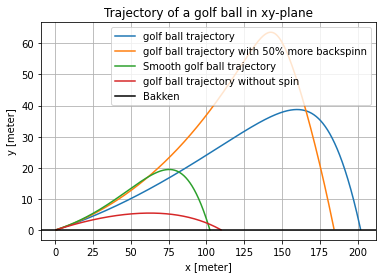

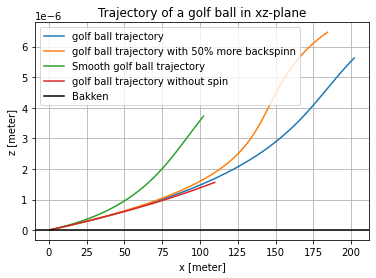

In [115]:
#Getting the arrays
_, w_golf = ode_solver_rk4(f_golf, t0, t_end, theta_golf, x0_golf, y0_golf, z0_a,v0_golf, 0, h, rk4)   #Bruker RK4 
_, w_golf_backspin = ode_solver_rk4(f_golf_backspin, t0, t_end, theta_golf, x0_golf, y0_golf, z0_a,v0_golf, 0, h, rk4)
_, w_smooth = ode_solver_rk4(f_smooth, t0, t_end, theta_golf, x0_golf, y0_golf, z0_a,v0_golf, 0, h, rk4)
_, w_nospin = ode_solver_rk4(f_nospin, t0, t_end, theta_golf, x0_golf, y0_golf, z0_a,v0_golf, 0, h, rk4)

#Finding when the ball hits the ground
_, i_golf = x_pos(w_golf)           
_, i_golf_backspin = x_pos(w_golf_backspin)   
_, i_smooth = x_pos(w_smooth) 
_, i_nospin = x_pos(w_nospin)
                      
#Slicing the relevant arrays   
x_val_golf = w_golf[1:i_golf,0]
y_val_golf = w_golf[1:i_golf,1]
z_val_golf = w_golf[1:i_golf,2]

x_val_golfbs = w_golf_backspin[1:i_golf_backspin,0]
y_val_golfbs = w_golf_backspin[1:i_golf_backspin,1]
z_val_golfbs = w_golf_backspin[1:i_golf_backspin,2]

x_val_smooth = w_smooth[1:i_smooth,0]
y_val_smooth = w_smooth[1:i_smooth,1]
z_val_smooth = w_smooth[1:i_smooth,2]

x_val_nospin = w_nospin[1:i_nospin,0]
y_val_nospin = w_nospin[1:i_nospin,1]
z_val_nospin = w_nospin[1:i_nospin,2]

#plotting
plt.figure()
plt.title("Trajectory of a golf ball in xy-plane")
plt.xlabel("x [meter]")
plt.ylabel("y [meter]")
plt.plot(x_val_golf,y_val_golf, label="golf ball trajectory")
plt.plot(x_val_golfbs,y_val_golfbs, label="golf ball trajectory with 50% more backspinn")
plt.plot(x_val_smooth,y_val_smooth, label="Smooth golf ball trajectory")
plt.plot(x_val_nospin,y_val_nospin, label="golf ball trajectory without spin")
plt.axhline(0, color = 'k', label="Bakken")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.title("Trajectory of a golf ball in xz-plane")
plt.xlabel("x [meter]")
plt.ylabel("z [meter]")
plt.plot(x_val_golf,z_val_golf, label="golf ball trajectory")
plt.plot(x_val_golfbs,z_val_golfbs, label="golf ball trajectory with 50% more backspinn")
plt.plot(x_val_smooth,z_val_smooth, label="Smooth golf ball trajectory")
plt.plot(x_val_nospin,z_val_nospin, label="golf ball trajectory without spin")
plt.axhline(0, color = 'k', label="Bakken")
plt.legend()
plt.grid()
plt.show()



From the plots we see the trajectories of a golf ball with backspin, a golf ball with 50% more backspin, a smooth golfball and a golf ball without spin. One can clearly see that the golf ball with backspin has the longest range in the x-direction while til smooth golf ball has the smallest range. In addition the golf ball with 50% more backspin goes the highest, which makes sense when looking at the equations of motion.

Furthermore, you can see that neither of them have a trajectory which travels far in the z-direction.

#### b.
Calculate the trajectory for a hooking or slicing golf ball by giving
the ball additional side spin (spin in the x-direction), with the same
angular velocity as used before and with 50% more spin. Adapt the
equations of motion correspondingly by using the fact that ~FM =
S0~ω × ~v. Plot the trajectories in the xy-, xz- and zy-planes or in a
3D plot.

In [116]:
#Function for calculating the golf trajectory with hooking ball---------------------------------------------
def f_golf_hook(t_val, eq_val):
    v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)

    C_x = constant(eq_val[-1][3])
    C_y = constant(eq_val[-1][4])

    f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
    f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2

    S0_x = (S0wm_golf * eq_val[-1][4])
    S0_y1 = (S0wm_golf * eq_val[-1][3])
    S0_y2 = (S0wm_golf * eq_val[-1][5])
    S0_z = (S0wm_golf * eq_val[-1][4])
   

    arr = np.array([eq_val[-1][3], eq_val[-1][4], eq_val[-1][5],
                    - f_drag_x/m_golf - 1.5*S0_x,
                    -g - f_drag_y/m_golf + 1.5*S0_y1 - S0_y2 ,S0_z,0])
    return arr

<ipython-input-116-45b192bbedaf>:3: RuntimeWarning: overflow encountered in double_scalars
  v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)
<ipython-input-116-45b192bbedaf>:9: RuntimeWarning: overflow encountered in double_scalars
  f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2
<ipython-input-116-45b192bbedaf>:8: RuntimeWarning: overflow encountered in double_scalars
  f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
<ipython-input-116-45b192bbedaf>:18: RuntimeWarning: invalid value encountered in double_scalars
  - f_drag_x/m_golf - 1.5*S0_x,
<ipython-input-114-443aec1fe68e>:12: RuntimeWarning: overflow encountered in double_scalars
  v_golf = np.sqrt(eq_val[-1][3]**2 + eq_val[-1][4]**2)
<ipython-input-114-443aec1fe68e>:18: RuntimeWarning: overflow encountered in double_scalars
  f_drag_y = C_y * rho * A_golf * eq_val[-1][4]**2
<ipython-input-114-443aec1fe68e>:17: RuntimeWarning: overflow encountered in double_scalars
  f_drag_x = C_x * rho * A_golf * eq_val[-1][3]**2
<ipyth

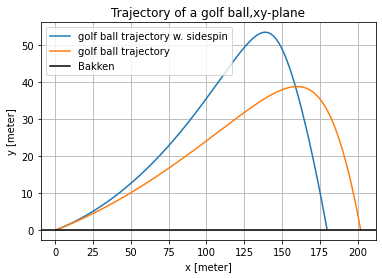

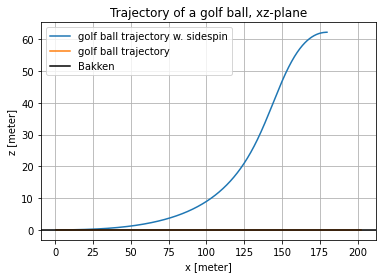

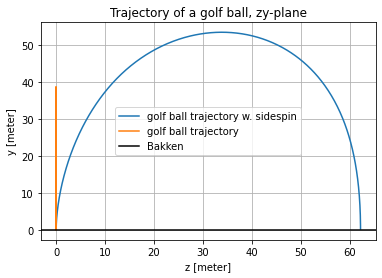

In [117]:
#Getting the arrays
_, w_golf_hook = ode_solver_rk4(f_golf_hook, t0, t_end, theta_golf, x0_golf, y0_golf, z0_a,v0_golf, 0, h, rk4)   #Bruker RK4 
_, w_golf_reg = ode_solver_rk4(f_golf, t0, t_end, theta_golf, x0_golf, y0_golf, z0_a,v0_golf, 0, h, rk4)


#Finding when the ball hits the ground
_, i_golf_hook = x_pos(w_golf_hook)
_, i_golf_reg = x_pos(w_golf_reg)           

#Slicing the relevant arrays   
x_val_golf_hook = w_golf_hook[1:i_golf_hook,0]
y_val_golf_hook = w_golf_hook[1:i_golf_hook,1]
z_val_golf_hook = w_golf_hook[1:i_golf_hook,2]

x_val_golf_reg = w_golf_reg[1:i_golf_reg,0]
y_val_golf_reg = w_golf_reg[1:i_golf_reg,1]
z_val_golf_reg = w_golf_reg[1:i_golf_reg,2]


#plotting
plt.figure()
plt.title("Trajectory of a golf ball,xy-plane")
plt.xlabel("x [meter]")
plt.ylabel("y [meter]")
plt.plot(x_val_golf_hook,y_val_golf_hook, label="golf ball trajectory w. sidespin")
plt.plot(x_val_golf_reg,y_val_golf_reg, label="golf ball trajectory")
plt.axhline(0, color = 'k', label="Bakken")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.title("Trajectory of a golf ball, xz-plane")
plt.xlabel("x [meter]")
plt.ylabel("z [meter]")
plt.plot(x_val_golf_hook,z_val_golf_hook, label="golf ball trajectory w. sidespin")
plt.plot(x_val_golf_reg,z_val_golf_reg, label="golf ball trajectory")
plt.axhline(0, color = 'k', label="Bakken")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.title("Trajectory of a golf ball, zy-plane")
plt.xlabel("z [meter]")
plt.ylabel("y [meter]")
plt.plot(z_val_golf_hook,y_val_golf_hook, label="golf ball trajectory w. sidespin")
plt.plot(z_val_golf_reg,y_val_golf_reg, label="golf ball trajectory")
plt.axhline(0, color = 'k', label="Bakken")
plt.legend()
plt.grid()
plt.show()




Here we see three plots; one for xy, xz and zy each. In the xy-plot we see that the golf ball without sidespin has the longest range, and the golfball with sidespin goes the highest. In the xz-plot see the trajectory of the balls seen from "above". Notice that we cannot see the yellow trajectory, which is due to the ball barely moving in the z-direction. This you could also see in the xz-plot in 2a). In the zy-plane we see the trajectories from the "side". We easily see that the golf ball with side spin goes up and down, just as one would expect. However it is difficult to see the yellow trajectory. This is because the yellow trajectory mostly travels in the x- and y-direction.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=100b86e6-b9f4-43f6-b65b-002cd459dab2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>